In [1]:
''' 필요한 라이브러리를 불러옵니다. '''

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

''' 신경망 모델을 구성합니다. '''

# 이미지는 28 X 28 픽셀로 원 핫 인코딩이므로 784가지 특징으로 구성됩니다.
X = tf.placeholder(tf.float32, [None, 784])

# 레이블은 0부터 9까지 총 10개의 분류로 구성됩니다.
Y = tf.placeholder(tf.float32, [None, 10])

# 784(입력층) → 256 (은닉층 1) → 64 (은닉층 2) → 10 (출력층)
# 표준 편차는 0.01로 정규분포를 가지도록 구성합니다.
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 64], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([64, 10], stddev=0.01))
model = tf.matmul(L2, W3)

# 교차 엔트로피 손실 함수를 이용합니다.
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))

# 손실값을 최소화하도록 최적화 작업을 수행합니다.
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [2]:
''' 신경망 모델을 학습시킵니다. '''

# 세션을 이용해 모델을 동작시킵니다.
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 데이터를 100개 단위로 쪼개서 학습시킵니다.
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# 학습 데이터를 총 10번 반복해서 학습합니다.
for epoch in range(10):
    total_cost =  0
    for i in range(total_batch):
        # 이미지 데이터, 출력 데이터를 구분하여 가져옵니다.
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_x, Y: batch_y})
        total_cost += cost_val
    print('반복:', '%04d' % (epoch + 1), '평균 손실값: ', '{:.4f}'.format(total_cost / total_batch))
print('학습 완료!')    

''' 학습 정도를 확인합니다. '''

# 학습된 모델 값과 실제 결과 값을 비교합니다.
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))

# 비용 함수를 적용해 정확도를 측정합니다.
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y:mnist.test.labels}))

반복: 0001 평균 손실값:  0.5060
반복: 0002 평균 손실값:  0.2043
반복: 0003 평균 손실값:  0.1333
반복: 0004 평균 손실값:  0.0962
반복: 0005 평균 손실값:  0.0758
반복: 0006 평균 손실값:  0.0595
반복: 0007 평균 손실값:  0.0480
반복: 0008 평균 손실값:  0.0384
반복: 0009 평균 손실값:  0.0312
반복: 0010 평균 손실값:  0.0265
학습 완료!
정확도: 0.97900003


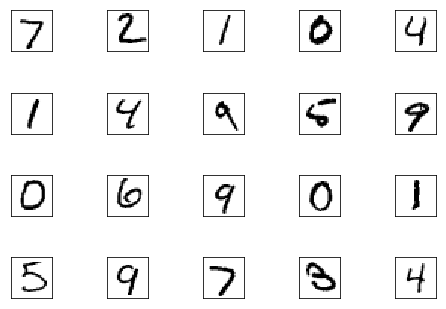

In [4]:
''' 결과를 그림으로 확인합니다. '''

fig = plt.figure()
# 그림 사이에 간격을 설정합니다.
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=1, hspace=1)
for i in range(20):
    # 4 X 5개의 테스트 이미지를 대상으로 예측을 수행합니다.
    subplot = fig.add_subplot(4, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    # 예측 결과를 각 그림의 위쪽에 출력합니다.
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
plt.show() 